<a href="https://colab.research.google.com/github/Yael313255748/Machine-Learning-Proyects/blob/main/General_Linear_Models_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de paquetes

In [35]:
from autograd import numpy as np
from autograd.scipy.stats import  norm , t
from autograd import deriv,elementwise_grad,grad,jacobian,holomorphic_grad
import matplotlib.pyplot as plt
%matplotlib inline

# Loss Functions

In [36]:

class Loss():

  def __init__(self,name,**kwargs):

    self.name = name

    for kw in kwargs:
      
      exec('self.{} = kwargs.get("{}") '.format(kw,kw))
  
  def __call__(self,y_true,y_pred):

    pass


  def derivative(self,y_true,y_pred):

    Dloss = elementwise_grad(self,1)

    return Dloss(y_true,y_pred)

class MSE(Loss):

  def __init__(self):

    super().__init__('MSE')
  
  def __call__(self,y_true,y_pred):

    e2 = (y_true-y_pred)**2

    return (1/2)*np.mean(e2)


class MAE(Loss):

  def __init__(self):

    super().__init__('MAE')
  
  def __call__(self,y_true,y_pred):

    ae = np.abs(y_true-y_pred)

    return np.mean(ae)

class MSLE(Loss):

  def __init__(self):

    super().__init__('MSLE')
  
  def __call__(self,y_true,y_pred):

    le2 = (np.log(y_true)-np.log(y_pred))**2 

    return (1/2)*np.mean(le2)

class Huber_Loss(Loss):

  def __init__(self,delta=1.0):

    super().__init__('Huber_Loss',delta=delta)
  
  def __call__(self,y_true,y_pred):

    delta = self.delta

    ae = np.abs(y_true-y_pred)

    e2 = (y_true-y_pred)**2

    hloss=np.where(ae<=delta, (1/2)*e2, delta*ae-(1/2)*(delta**2))

    return np.mean(hloss)

class Binary_Cross_Entropy(Loss):

  def __init__(self):
    
    super().__init__('Binary_Cross_Entropy')
  
  def __call__(self, y_true, y_pred):
    
    return -np.mean(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))

class Categorical_Cross_Entropy(Loss):
  
  def __init__(self):
    
    super().__init__('Categorical_Cross_Entropy')
  
  def __call__(self, y_true, y_pred):
    
    return -np.mean(y_true*np.log(y_pred),axis=0)
  
  def derivative(self, y_true, y_pred):
      return super().derivative(y_true, y_pred)

# class SVM_Loss(Loss):

#   def __init__(self):

#       super().__init__('SVM_Loss')

#   def __call__(self,y_true,y_pred):

#       return np.sum()

  

# Metrics

In [37]:
class metric():

  def __init__(self,name,**params):

    self.name = name

    for par in params:
      
      exec('self.{} = params.get("{}") '.format(par,par))
  
  def __call__(self,y_true,y_pred):

      pass


class binary_accuracy(metric):

  def __init__(self,threshold=0.5):

    super().__init__('accuracy',threshold=threshold)
  
  def __call__(self,y_true,y_pred):

    y_true = y_true.astype(float).reshape(-1,1)

    y_pred = np.where(y_pred>self.threshold,1.,0.).reshape(-1,1)

    return len(y_true[y_true == y_pred])/len(y_true)


class r2(metric):

  def __init__(self):

    super().__init__('r2')
  
  def __call__(self,y_true,y_pred):

    SSR = np.sum((y_pred-np.mean(y_true))**2)

    SST = np.sum((y_true-np.mean(y_true))**2)

    return SSR / SST
    

# Activations Functions

In [38]:
class activation():

  def __init__(self, name, **params):

    self.name = name
    
    for par in params:
      
      exec('self.{} = params.get("{}") '.format(par,par))

  def __call__(self,x):

      pass
  
  def derivative(self,x):

    dact = elementwise_grad(self)

    return dact(x)

class linear(activation):

  def __init__(self):

      super().__init__('linear')

  def __call__(self, x):
    
    return x

class sigmoid(activation):

  def __init__(self):

      super().__init__('sigmoid')

  def __call__(self, x):
    
    return 1/(1+np.exp(-x))


class norm_dist(activation):

  def __init__(self):

      super().__init__('norm_dist')

  def __call__(self, x):
    
    return norm.cdf(x)

class t_dist(activation):

  def __init__(self):

      super().__init__('t_dist')

  def __call__(self, x):
    
    return t.cdf(x)


class relu(activation):

  def __init__(self):

      super().__init__('sigmoid')

  def __call__(self, x):
    
    return np.where(x>0,x,0)

class tanh(activation):

  def __init__(self):

      super().__init__('tanh')

  def __call__(self, x):
    
    return np.tanh(x)

class exponential(activation):

  def __init__(self):

      super().__init__('exponential')

  def __call__(self, x):
    
    return np.exp(x)

class elu(activation):

  def __init__(self,alpha = 1.0):

      super().__init__('elu',alpha=alpha)

  def __call__(self, x):
    
    return np.where(x>=0,x,self.alpha*(np.exp(x)-1))


class softmax(activation):

  def __init__(self):

      super().__init__('softmax')

  def __call__(self, x):

    ex = np.exp(x)
    
    return ex/(ex.sum(axis=1).reshape(-1,1))
  
  def derivative(self, x):

      return self(x)*(1-self(x))




# Initializers

In [39]:
class initializer():

  def __init__(self,**kwargs) -> None:
    
    for kw in kwargs:
      
      exec('self.{} = kwargs.get("{}") '.format(kw,kw))
  
  def __call__(self, shape):
      pass

class normal(initializer):

  def __init__(self,mu = 0.0, sigma=1.0):

      super().__init__(mu=mu,sigma=sigma)
  
  def __call__(self, shape):

      return np.random.normal(loc = self.mu, scale = self.sigma,size=shape)

class uniform(initializer):

  def __init__(self,a = 0.0, b=1.0):

      super().__init__(a=a,b=b)
  
  def __call__(self, shape):

      return np.random.uniform(low = self.a , high= self.b , size = shape)

class ones(initializer):
  
  def __call__(self, shape):
    
    return np.ones(shape=shape)

class zeros(initializer):
  
  def __call__(self, shape):
    
    return np.zeros(shape=shape)

class glorot_normal(initializer):

  def __call__(self, shape):

    sigma = (2/(shape[1]+shape[0]))**(1/2)
    
    return np.random.normal(scale=sigma,size=shape)


class he_normal(initializer):

  def __call__(self, shape):

    sigma = (2/(shape[0]))**(1/2)
    
    return np.random.normal(scale=sigma,size=shape)


# GLM Class

In [40]:
class GLM():

  def __init__(self,X,y,act,loss,init_weights,init_bias,metric=None,r=0,
               alpha=0,lr=0.05,epochs=50,batch_size=1,seed=None):

    self.X = X
    self.y = y.reshape(-1,1)

    self.r = r
    self.alpha = alpha
    self.lr = lr
    self.epochs = epochs
    self.batch_size = batch_size

    self.seed = seed

    self.n_features = X.shape[1]

    self.act = act
    self.loss = loss
    self.metric = metric

    self.history = None

    self.init_weights = init_weights
    self.init_bias = init_bias

    np.random.seed(self.seed)

    self.weights = init_weights(shape=(1,self.n_features))

    self.bias = init_bias(shape=(1,1))
  
  def forwardpropagation(self,X):

    z = self.bias+X.dot(self.weights.T)

    y_pred = self.act(z)

    return z, y_pred
  
  def predict(self,X):

    y_pred = self.forwardpropagation(X)[1]

    return y_pred
  
  def backwardpropagation(self,y_true,y_pred,z,X):

    Dloss = self.loss.derivative(y_true,y_pred)
    Dact = self.act.derivative(z)

    DW = (Dloss*Dact).T.dot(X)
    Db = (Dloss*Dact).T.dot(np.ones((X.shape[0],1)))

    return DW, Db
  
  def fit(self,validation_split=0.0):

    np.random.seed(self.seed)

    n_obs = self.X.shape[0]

    test_size = round(n_obs*validation_split)

    test_obs = np.random.choice(n_obs,test_size)

    X_test = self.X[test_obs,:]
    y_test = self.y[test_obs]

    X_train = np.delete(self.X,test_obs,axis=0)
    y_train = np.delete(self.y,test_obs,axis=0)

    self.history = {'{}'.format(self.loss.name):[]}


    if self.metric == None:

      if validation_split != 0.0:
        
        self.history.update({'val_{}'.format(self.loss.name):[]})

    else:

      self.history.update({'{}'.format(self.metric.name):[]})

      if validation_split != 0.0:

        self.history.update({'val_{}'.format(self.loss.name):[]})

        self.history.update({'val_{}'.format(self.metric.name):[]})


    for ep in range(self.epochs):
      
      samp = np.random.choice(X_train.shape[0],self.batch_size)

      X = X_train[samp,:]
      y = y_train[samp,:]
      
      z , y_hat = self.forwardpropagation(X)

      DW, Db = self.backwardpropagation(y,y_hat,z,X)

      self.weights -= self.lr*DW+self.r*self.alpha*np.sign(self.weights)+(1-self.r)*self.alpha*self.weights
      self.bias -= self.lr*Db


      loss = self.loss(y_train,self.predict(X_train))

      self.history['{}'.format(self.loss.name)].append(loss)

      if validation_split == 0.0:

        if self.metric == None:
          
          print('Epoch {} , {} : {:.4f} '.format(ep+1,self.loss.name,loss))
        
        else:

          met = self.metric(y_train,self.predict(X_train))

          self.history['{}'.format(self.metric.name)].append(met)

          print('Epoch {} , {} : {:.4f}, {} : {:.4f} '.\
                format(ep+1,self.loss.name,loss,self.metric.name,met))
      else:

        val_loss = self.loss(y_test,self.predict(X_test))

        self.history['val_{}'.format(self.loss.name)].append(val_loss)

        if self.metric == None:

          print('Epoch {} , {} : {:.4f} , val_{}: {:.4f}'\
              .format(ep+1,self.loss.name,loss,self.loss.name,val_loss))
        else:

          met = self.metric(y_train,self.predict(X_train))
          val_met = self.metric(y_test,self.predict(X_test))

          self.history['{}'.format(self.metric.name)].append(met)

          self.history['val_{}'.format(self.metric.name)].append(val_met)

          print('Epoch {} , {} : {:.4f}, {} : {:.4f} , val_{}: {:.4f}, val_{} : {:.4f}'\
              .format(ep+1,self.loss.name,loss,self.metric.name,met
                      ,self.loss.name,val_loss,self.metric.name,val_met))
          
      print('--------------------------------------------------------')

# Fitted  Regression models

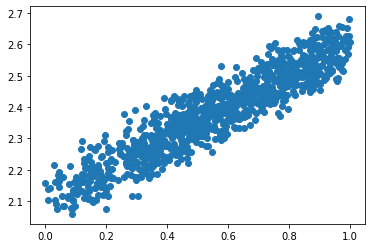

In [41]:
n=1000
X=np.random.beta(1.5,1.2,size=(n,1))
y=2.1+0.5*X[:,0]+np.random.normal(0.0,0.05,size=(n))
plt.scatter(X,y)
plt.show()

In [44]:
ep = 1000
linear_reg = GLM(X,y,linear(),MSE(),he_normal(),zeros(),
                 epochs=ep,batch_size=100,lr=0.1,metric=r2()) 

linear_reg.fit(validation_split=0.3)

Epoch 1 , MSE : 2.0156, r2 : 217.3581 , val_MSE: 2.0211, val_r2 : 237.7805
--------------------------------------------------------
Epoch 2 , MSE : 1.5202, r2 : 164.3027 , val_MSE: 1.5246, val_r2 : 179.7220
--------------------------------------------------------
Epoch 3 , MSE : 1.1509, r2 : 124.7776 , val_MSE: 1.1544, val_r2 : 136.4589
--------------------------------------------------------
Epoch 4 , MSE : 0.8703, r2 : 94.7974 , val_MSE: 0.8731, val_r2 : 103.6284
--------------------------------------------------------
Epoch 5 , MSE : 0.6566, r2 : 72.0020 , val_MSE: 0.6587, val_r2 : 78.6516
--------------------------------------------------------
Epoch 6 , MSE : 0.4976, r2 : 55.0643 , val_MSE: 0.4993, val_r2 : 60.0864
--------------------------------------------------------
Epoch 7 , MSE : 0.3775, r2 : 42.2968 , val_MSE: 0.3787, val_r2 : 46.0826
--------------------------------------------------------
Epoch 8 , MSE : 0.2862, r2 : 32.6173 , val_MSE: 0.2871, val_r2 : 35.4575
----------

In [45]:
linear_reg.bias

array([[2.10211878]])

In [46]:
linear_reg.weights

array([[0.50612862]])

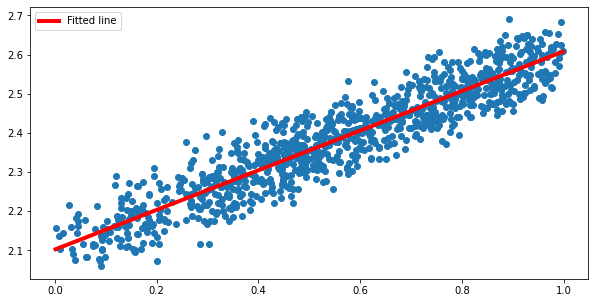

In [47]:
x_new = np.linspace(X.min(),X.max(),num=10).reshape(-1,1)
plt.figure(figsize=(10,5))
plt.scatter(X,y)
plt.plot(x_new,linear_reg.predict(x_new),c='red',linewidth=4.0,label='Fitted line')
plt.legend()
plt.show()

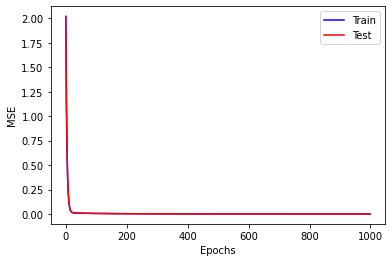

In [48]:
plt.plot(linear_reg.history['MSE'],c ='b',label='Train')
plt.plot(linear_reg.history['val_MSE'],c='r',label='Test')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

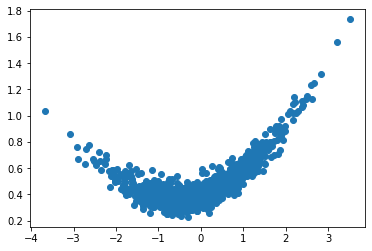

In [49]:
n=1000

X=np.random.normal(0.0,1.0,size=(n,1))

X = np.insert(X,1,X[:,0]**2,axis=1)


y=0.4+0.1*X[:,0]+0.08*X[:,1]+np.random.normal(0.0,0.06,size=(n))
plt.scatter(X[:,0],y)
plt.show()

In [50]:
linear_reg = GLM(X,y,linear(),MSE(),uniform(),zeros(),metric=r2(),
                 epochs=1000,batch_size=32,lr=0.1,r=0.0,alpha=0.0) 
linear_reg.fit(validation_split=0.3)

Epoch 1 , MSE : 0.1062, r2 : 12.4084 , val_MSE: 0.1016, val_r2 : 13.8974
--------------------------------------------------------
Epoch 2 , MSE : 0.0950, r2 : 11.6672 , val_MSE: 0.0907, val_r2 : 13.0378
--------------------------------------------------------
Epoch 3 , MSE : 0.0858, r2 : 10.9640 , val_MSE: 0.0821, val_r2 : 12.2639
--------------------------------------------------------
Epoch 4 , MSE : 0.0825, r2 : 10.7784 , val_MSE: 0.0793, val_r2 : 12.0992
--------------------------------------------------------
Epoch 5 , MSE : 0.0733, r2 : 9.8763 , val_MSE: 0.0712, val_r2 : 11.1551
--------------------------------------------------------
Epoch 6 , MSE : 0.0684, r2 : 9.4483 , val_MSE: 0.0670, val_r2 : 10.7322
--------------------------------------------------------
Epoch 7 , MSE : 0.0640, r2 : 9.0390 , val_MSE: 0.0631, val_r2 : 10.3073
--------------------------------------------------------
Epoch 8 , MSE : 0.0594, r2 : 8.6024 , val_MSE: 0.0581, val_r2 : 9.7412
----------------------

In [51]:
linear_reg.weights

array([[0.10064656, 0.08321417]])

In [52]:
linear_reg.bias

array([[0.39611299]])

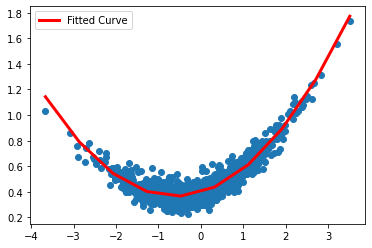

In [53]:
x_new = np.linspace(X[:,0].min(),X[:,0].max(),num=10).reshape(-1,1)

x_new = np.insert(x_new,1,x_new[:,0]**2,axis=1)

plt.scatter(X[:,0],y)
plt.plot(x_new[:,0],linear_reg.predict(x_new),c='red',linewidth=3.0,label='Fitted Curve')
plt.legend()
plt.show()

# Fitted Clasification Models

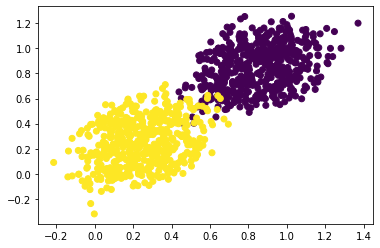

In [54]:
n = 500

X1=np.random.uniform(0.0,0.5,size=(n,2))+np.random.normal(0.0,0.1,size=(n,1))

X2=np.random.uniform(0.6,1.1,size=(n,2))+np.random.normal(0.0,0.1,size=(n,1))

X = np.insert(X1,1,X2,axis=0)


y1 = np.ones((n,1))
y2 = np.zeros((n,1))

y = np.insert(y1,1,y2,axis=0)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [56]:
logit_model = GLM(X,y,norm_dist(),Binary_Cross_Entropy(),uniform(),uniform(),metric=binary_accuracy(),batch_size=100,
                  epochs=1000,lr=0.1)
logit_model.fit(validation_split=0.3)

Epoch 1 , Binary_Cross_Entropy : 1.4796, accuracy : 0.4993 , val_Binary_Cross_Entropy: 1.5031, val_accuracy : 0.4900
--------------------------------------------------------
Epoch 2 , Binary_Cross_Entropy : 1.3434, accuracy : 0.4993 , val_Binary_Cross_Entropy: 1.3625, val_accuracy : 0.4900
--------------------------------------------------------
Epoch 3 , Binary_Cross_Entropy : 1.2163, accuracy : 0.4993 , val_Binary_Cross_Entropy: 1.2312, val_accuracy : 0.4900
--------------------------------------------------------
Epoch 4 , Binary_Cross_Entropy : 1.1056, accuracy : 0.4980 , val_Binary_Cross_Entropy: 1.1170, val_accuracy : 0.4900
--------------------------------------------------------
Epoch 5 , Binary_Cross_Entropy : 1.0187, accuracy : 0.4939 , val_Binary_Cross_Entropy: 1.0272, val_accuracy : 0.4900
--------------------------------------------------------
Epoch 6 , Binary_Cross_Entropy : 0.9551, accuracy : 0.4831 , val_Binary_Cross_Entropy: 0.9614, val_accuracy : 0.4867
-------------

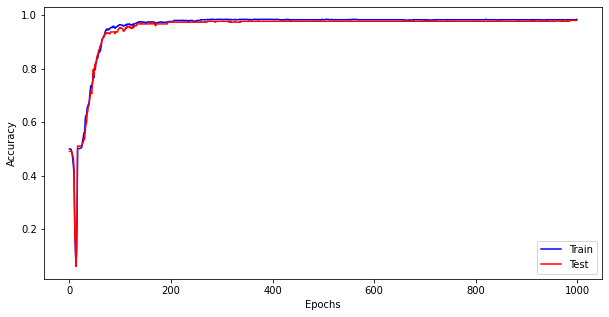

In [59]:
plt.figure(figsize=(10,5))
plt.plot(logit_model.history['accuracy'],c ='b',label='Train')
plt.plot(logit_model.history['val_accuracy'],c='r',label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()